# Single Layer Perceptron

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [18]:
def unit_step_func(x):
    return np.where(x>0, 1, 0) # if x>0 return 1, 0 otherwise

In [27]:
class Perceptron:

    def __init__(self, learning_rate=0.001, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.activation_func = unit_step_func
        self.weights = None
        self.bias = None


    def fit(self, X, y):
        n_samples, n_features = X.shape

        # initialization
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iter):
            for index, x_input in enumerate(X):
                #print(index, x_input)
                linear_output = np.dot(x_input, self.weights) + self.bias # peso*input+bias
                y_predicted = self.activation_func(linear_output) # here I assign only 0 or 1

                error = y[index] - y_predicted
                update = self.learning_rate * error
                self.weights += update * x_input
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted 

In [28]:
from sklearn.preprocessing import StandardScaler

# Loading dataset
dataset = pd.read_csv('Iris.csv')

# Setosa vs Non-Setosa problem reduction
dataset['Class'] = dataset['Class'].apply(lambda x: 1 if x == 'Iris-setosa' else 0)

# Selection of X and y
X = dataset.drop(columns=['Class']).values
y = dataset['Class'].values

# Data normalization
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

perceptron = Perceptron(learning_rate=0.01, n_iter=500)
perceptron.fit(X_train, y_train)

y_pred = perceptron.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



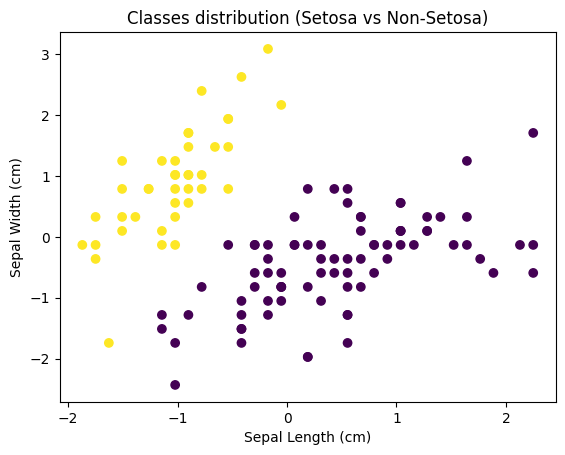

In [29]:
fig = plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Classes distribution (Setosa vs Non-Setosa)")
plt.show()

In [31]:
from sklearn.linear_model import Perceptron

clf = Perceptron(max_iter=1000, eta0=0.01, random_state=42)
clf.fit(X_train, y_train)

# Predizioni
y_pred = clf.predict(X_test)

# Valutazione
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

